In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import time
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import pprint
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
def evaluation_metrics(Y_test, preds):
    # Creating a confusion matrix
    cm = confusion_matrix(Y_test, preds)

    # Printing the classification report
    print(classification_report(Y_test, preds))

    # Printing the F1 Score
    print("F1 Score: ", f1_score(Y_test, preds, average='weighted'))
    
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
    plt.title('Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()
    

# General Data Process

**Target Values**
1. **M0000 (0)**
2. **M2503 (1)**
3. **M2508 (2)**



In [16]:
# Reading Train Datasets
df_M0000=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df_M0000['target'] = 0
df_M2503=pd.read_csv(r'E:\Havelsan\Datasets\M2503_train_sensors.csv', engine='c')
df_M2503['target'] = 1
df_M2508=pd.read_csv(r'E:\Havelsan\Datasets\M2508_train_sensors.csv', engine='c')
df_M2508['target'] = 2
df = pd.concat([df_M0000,df_M2503,df_M2508], axis=0)
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear,target
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1410,0
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1409,0
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1408,0
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1407,0
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1406,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706371,00:22:12,FAU,SW28,WC6,35,12.4602,25.1648,2757.11,12.3641,2.87130,...,16.0775,6,15.7389,31.6045,0.0,1.0,0.0,0.0,4,2
706372,00:22:13,FAU,SW28,WC6,35,12.4691,25.1000,2757.11,12.3815,2.87130,...,16.0790,6,15.7460,31.6222,0.0,1.0,0.0,0.0,3,2
706373,00:22:14,FAU,SW28,WC6,35,12.4781,25.0352,2757.11,12.3989,2.87130,...,16.0804,6,15.7530,31.6398,0.0,1.0,0.0,0.0,2,2
706374,00:22:15,FAU,SW28,WC6,35,12.4870,24.9703,2757.11,12.4163,2.87130,...,16.0819,6,15.7601,31.6574,0.0,1.0,0.0,0.0,1,2


In [17]:
# Setting initial conditions
SeaTemp='SW20'
WindSpeed='WC0'
Load='FAU'
df=df[df['SeaTemp']==SeaTemp]
df=df[df['WindSpeed']==WindSpeed]
df=df[df['Load']==Load]
result=df
result.dropna(inplace=True)
result.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_train=result[abr_sensor_list+['target']]
df_train

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target
0,14.09040,266.676,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0
1,14.09040,266.676,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0
2,13.97260,347.270,0.000,13.73900,2.65347,2.83482,2.65506,73.9091,7.78951,2.15389,...,305.317,303.516,-1.81976,43.7985,48.0050,220.364,12.8062,12.9007,20.7326,0
3,13.98190,341.611,225.204,13.74950,2.65172,2.83517,2.65320,73.9162,7.78946,2.15398,...,305.333,303.529,-1.82216,43.7888,48.0049,220.367,12.8062,12.8980,20.6785,0
4,13.99120,335.952,450.408,13.76000,2.64996,2.83553,2.65133,73.9233,7.78941,2.15406,...,305.349,303.541,-1.82455,43.7792,48.0047,220.370,12.8063,12.8954,20.6244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121630,8.48925,267.164,2680.830,9.46467,2.05991,2.84047,1.75023,69.7798,7.94918,2.15171,...,305.261,253.440,-51.82170,43.8407,47.5894,220.566,12.8350,12.7650,19.6618,2
121631,7.55297,265.344,2679.090,8.72656,1.96473,2.84025,1.60343,69.0745,7.97611,2.15190,...,305.152,253.278,-51.87420,43.8381,47.5887,220.568,12.8414,12.6309,19.6039,2
121632,6.61668,263.523,2677.360,7.98846,1.86956,2.84002,1.45662,68.3693,8.00303,2.15208,...,305.043,253.117,-51.92680,43.8354,47.5880,220.571,12.8478,12.4968,19.5459,2
121633,5.68040,261.703,2675.620,7.25035,1.77438,2.83980,1.30982,67.6641,8.02995,2.15227,...,304.934,252.955,-51.97930,43.8327,47.5873,220.573,12.8543,12.3628,19.4880,2


In [18]:
# Reading Test Datasets
df_M0000=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
df_M0000['target'] = 0
df_M2503=pd.read_csv(r'E:\Havelsan\Datasets\M2503_test_sensors.csv', engine='c')
df_M2503['target'] = 1
df_M2508=pd.read_csv(r'E:\Havelsan\Datasets\M2508_test_sensors.csv', engine='c')
df_M2508['target'] = 2
df = pd.concat([df_M0000,df_M2503,df_M2508], axis=0)
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear,target
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1413,0
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1412,0
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1411,0
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1410,0
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363102,00:21:11,FAU,SW28,WC6,53,12.2713,24.8041,2854.77,11.3117,2.84142,...,16.2002,6,15.8048,32.3668,0.0,1.0,0.0,0.0,4,2
363103,00:21:12,FAU,SW28,WC6,53,12.2393,24.7914,2854.77,11.1414,2.83280,...,16.1980,6,15.8072,32.1289,0.0,1.0,0.0,0.0,3,2
363104,00:21:13,FAU,SW28,WC6,53,12.2073,24.7788,2854.77,10.9711,2.82417,...,16.1958,6,15.8096,31.8910,0.0,1.0,0.0,0.0,2,2
363105,00:21:14,FAU,SW28,WC6,53,12.4152,24.9221,2854.77,12.1801,2.86838,...,16.1937,6,15.8288,31.8499,0.0,1.0,0.0,0.0,1,2


In [19]:
# Setting initial conditions
SeaTemp='SW20'
WindSpeed='WC0'
Load='FAU'
df=df[df['SeaTemp']==SeaTemp]
df=df[df['WindSpeed']==WindSpeed]
df=df[df['Load']==Load]
result=df
result.dropna(inplace=True)
result.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_test=result[abr_sensor_list+['target']]
df_test

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target
0,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0
1,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0
2,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0
3,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0
4,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63452,8.47049,270.430,2683.40,9.45213,2.05788,2.83369,1.74808,69.7673,7.95029,2.15251,...,305.454,253.478,-51.53260,43.8587,47.5799,220.394,12.8403,12.7263,19.6532,2
63453,7.53458,269.205,2682.75,8.71584,1.96306,2.83378,1.60162,69.0624,7.97706,2.15274,...,305.425,253.342,-51.57610,43.8622,47.5793,220.394,12.8466,12.5993,19.5918,2
63454,6.59867,267.980,2682.11,7.97954,1.86824,2.83387,1.45517,68.3576,8.00383,2.15297,...,305.396,253.205,-51.61970,43.8658,47.5788,220.394,12.8528,12.4724,19.5303,2
63455,5.66276,266.755,2681.46,7.24325,1.77343,2.83396,1.30871,67.6528,8.03059,2.15320,...,305.368,253.068,-51.66320,43.8693,47.5782,220.394,12.8591,12.3454,19.4689,2


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121635 entries, 0 to 121634
Data columns (total 37 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   E02005  121635 non-null  float64
 1   E02006  121635 non-null  float64
 2   E02056  121635 non-null  float64
 3   E03760  121635 non-null  float64
 4   G00027  121635 non-null  float64
 5   G00108  121635 non-null  float64
 6   G02011  121635 non-null  float64
 7   N02015  121635 non-null  float64
 8   P00023  121635 non-null  float64
 9   P01005  121635 non-null  float64
 10  P01302  121635 non-null  float64
 11  P01303  121635 non-null  float64
 12  P01600  121635 non-null  float64
 13  P01602  121635 non-null  float64
 14  P02055  121635 non-null  float64
 15  P02065  121635 non-null  float64
 16  P02066  121635 non-null  float64
 17  P02071  121635 non-null  float64
 18  P02072  121635 non-null  float64
 19  Q02004  121635 non-null  float64
 20  T00002  121635 non-null  float64
 21  T01010  12

In [21]:
df_train['target'].value_counts()

0    44328
1    43273
2    34034
Name: target, dtype: int64

C:\Users\anilo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


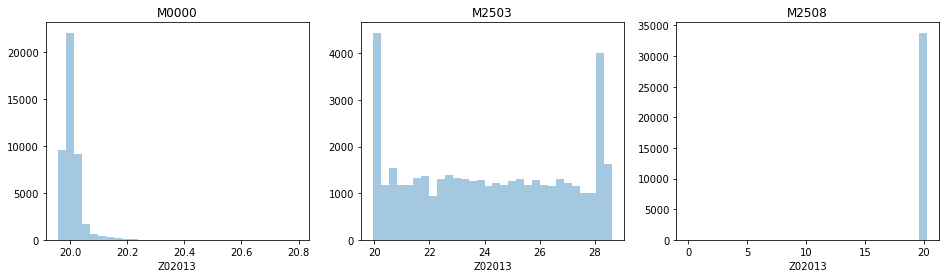

In [22]:
# Frequence of Z02013 according to label
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df_train[df_train['target']==0].Z02013, bins = 30, ax = axes[0], kde = False)
ax.set_title('M0000')
ax = sns.distplot(df_train[df_train['target']==1].Z02013, bins = 30, ax = axes[1], kde = False)
ax.set_title('M2503')
ax = sns.distplot(df_train[df_train['target']==2].Z02013, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('M2508')

Text(0.5, 1.0, 'M2508')

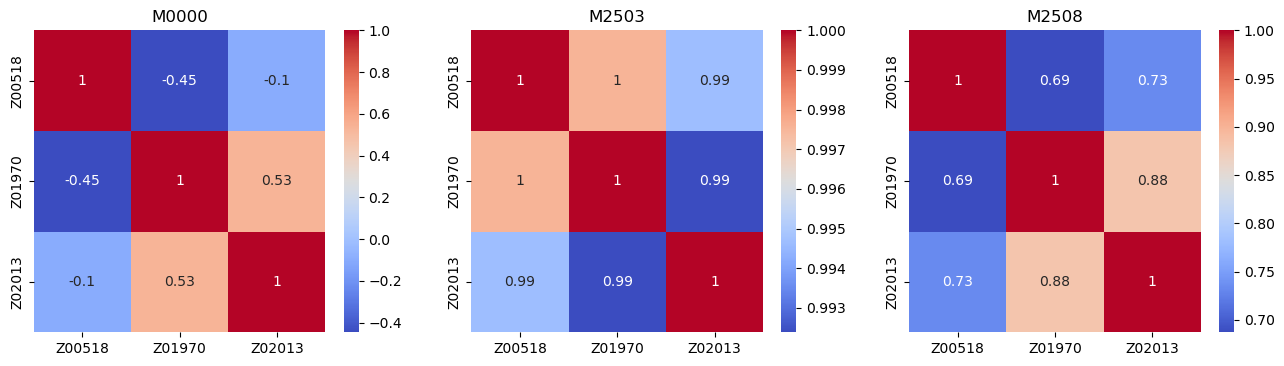

In [23]:
# Correlation of 3 target column whic we used in regression according to label
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df_train[df_train['target'] == 0][['Z00518', 'Z01970', 'Z02013']].corr(), ax = axes[0], cmap='coolwarm', annot=True)
ax.set_title('M0000')
ax = sns.heatmap(df_train[df_train['target'] == 1][['Z00518', 'Z01970', 'Z02013']].corr(), ax = axes[1], cmap='coolwarm', annot=True)
ax.set_title('M2503')
ax = sns.heatmap(df_train[df_train['target'] == 2][['Z00518', 'Z01970', 'Z02013']].corr(), ax = axes[2], cmap='coolwarm', annot=True)
ax.set_title('M2508')


In [24]:
# Train split
X_train = df_train.drop('target', axis = 1) # Features
Y_train = df_train['target']  # Target

In [12]:
# Test split
X_test = df_test.drop('target', axis = 1) # Features
Y_test = df_test['target']  # Target

# K-Nearest Neighbors (KNN)

**What is K-Nearest Neighbors ?**<br>
**-** K-Nearest Neighbors (KNN) is a type of instance-based learning algorithm that is used for both classification and regression problems.The KNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

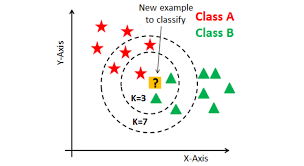

**Parameters of KNN**
1. **Number of Neighbors (k)**
2. **Distance Metric**
3. **Weighting**
3. **Algorithm Type**


In [56]:
# Data normalization for KNN and Pca
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

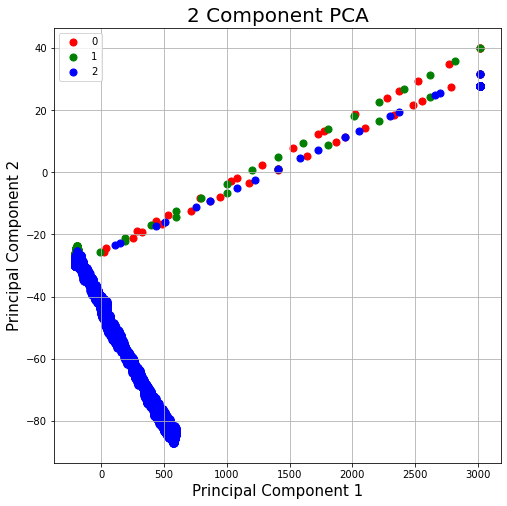

In [57]:
# Data visualization for how data splits
X = X_train
y = Y_train

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis=1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               c=color, 
               s=50)
ax.legend(targets)
ax.grid()


In [58]:
# Basic KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)
preds = knn.predict(X_test_scaled)
acc_knn = (preds == Y_test).sum().astype(float) / len(preds)*100
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 94.31


**What is Precision ?**<br>
**-** Precision is a metric used to quantify the quality of the prediction in a classification task. When a model makes a prediction, how often is it correct? Out of all the positive predicted, what percentage is truly positive.<br>
**Precision = (True Positives) / (True Positives + False Positives)**<br>
True Positives (TP): These are cases in which we predicted yes (or positive), and the actual result was also yes (or positive).<br>
False Positives (FP): These are cases in which we predicted yes (or positive), but the actual result was no (or negative). In other words, these are instances where the model incorrectly predicted the positive class.<br>

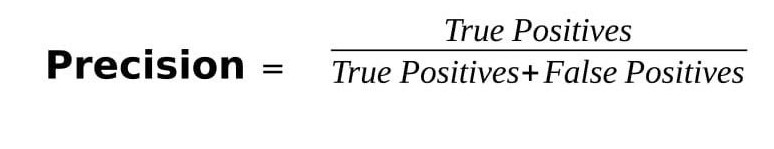

**What is Recall ?**<br>
**-** Recall, also known as sensitivity or true positive rate, is another critical metric in a classification task.How good the model is at predicting the positive class when the actual outcome is positive.Out of the total positive, what percentage are predicted positive. <br>
**Recall = (True Positives) / (True Positives + False Negatives)**<br>
True Positives (TP): These are the cases in which we predicted yes (or positive), and the actual outcome was also yes (or positive).<br>
False Negatives (FN): These are the cases in which we predicted no (or negative), but the actual outcome was yes (or positive). In other words, these are instances where the model incorrectly predicted the negative class.<br>

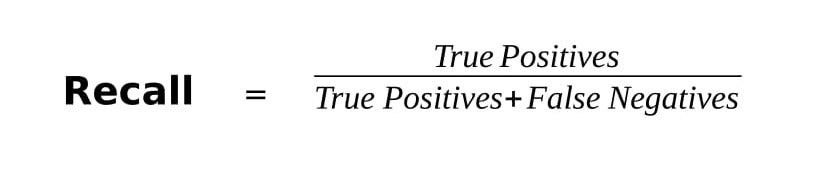

**What is F1 Score ?**<br>
**-** The F1 Score is a measure of a model's performance that considers both precision and recall.In short, while precision is about how accurate your model's positive predictions are and recall is about how well your model predicts the positive class, the F1 score is a balance of both these measures. It is a good metric to consider if you need both precision and recall to be high. <br>
**F1 Score = 2 * (Precision * Recall) / (Precision + Recall)**<br>


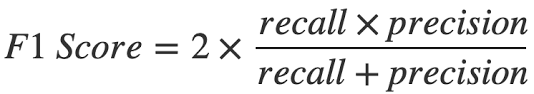

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     21594
           1       0.95      0.94      0.94     22026
           2       0.96      0.94      0.95     19837

    accuracy                           0.94     63457
   macro avg       0.94      0.94      0.94     63457
weighted avg       0.94      0.94      0.94     63457

F1 Score:  0.9431760452840239


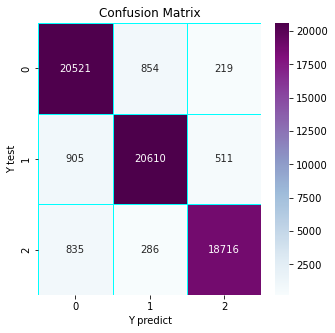

In [59]:
evaluation_metrics(Y_test, preds)

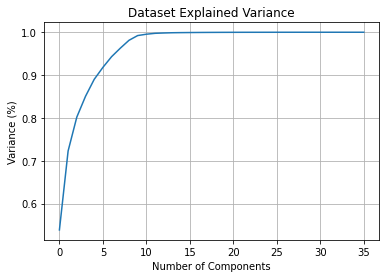

Component 1: 0.5384522852806147
Component 2: 0.7228208874947556
Component 3: 0.8018833975782657
Component 4: 0.8503721437687446
Component 5: 0.8900136766649588
Component 6: 0.917950626775373
Component 7: 0.9429524631906054
Component 8: 0.9627564891829845
Component 9: 0.9811856723554636
Component 10: 0.9922623424581669
Component 11: 0.9954022946562817
Component 12: 0.9974984244411464
Component 13: 0.9982612427105761
Component 14: 0.9988415090933503
Component 15: 0.9991191157688437
Component 16: 0.999307037747104
Component 17: 0.9994698697376823
Component 18: 0.9995998157130801
Component 19: 0.9996908564885607
Component 20: 0.9997731106912379
Component 21: 0.9998320610892955
Component 22: 0.999875916283903
Component 23: 0.9999047200425424
Component 24: 0.9999251681162179
Component 25: 0.9999419308718692
Component 26: 0.9999573143058021
Component 27: 0.9999706282714074
Component 28: 0.9999803951607587
Component 29: 0.9999876901163471
Component 30: 0.9999939067302364
Component 31: 0.999996

In [60]:
# Pca analysisf for n_componets
pca = PCA()
pca.fit(X_train_scaled)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Dataset Explained Variance')
plt.grid(True)
plt.show()
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, exp_var in enumerate(explained_variance):
    print(f"Component {i+1}: {exp_var}")


In [ ]:
# Dimensionality reduction
pca = PCA(n_components=20)  # choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Parameter tuning with grid search
parameters = {'n_neighbors':[3,5,7,9], 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5, n_jobs=-1)  # use all processor cores
grid_search.fit(X_train_pca, Y_train)

# Get the best parameters from the grid search
best_knn = grid_search.best_estimator_

# Print best parameters
print("Best parameters: ", grid_search.best_params_)

**I run the code in kaggle notebook. It almost run 32 minutes.**<br>
**Best parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}**

In [61]:
"""
# Dimensionality reduction
pca = PCA(n_components=20)  # or choose the number of components you've found best for your case
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
"""
# Define the KNN model with best parameters
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')

# Training the model
knn.fit(X_train_scaled, Y_train)

# Making predictions
preds = knn.predict(X_test_scaled)

# Calculate the accuracy
acc_knn = (preds == Y_test).sum().astype(float) / len(preds)*100

print("Improved K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))

Improved K Nearest Neighbors Classifier's prediction accuracy is: 94.43


              precision    recall  f1-score   support

           0       0.92      0.95      0.93     21594
           1       0.95      0.94      0.94     22026
           2       0.97      0.94      0.96     19837

    accuracy                           0.94     63457
   macro avg       0.95      0.94      0.94     63457
weighted avg       0.94      0.94      0.94     63457

F1 Score:  0.9443951495679095


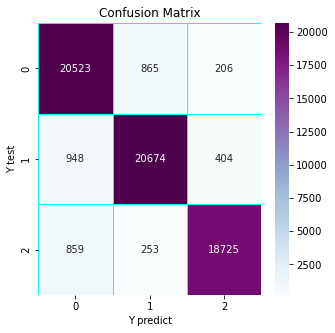

In [62]:
evaluation_metrics(Y_test, preds)

# Naive Bayes classifier

**What is Naive Bayes classifier ?**<br>
**-** The Naive Bayes classifier is a machine learning algorithm based on the principle of Bayes' Theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. In Naive Bayes, this theorem is extended to handle multiple features.

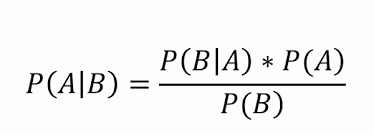

In [63]:
# Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler
scaler=MaxAbsScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
#  it assumes that each class, represented by the label, has a Gaussian (normal) distribution.
gnb = GaussianNB()
gnb.fit(X_train_scaled, Y_train)
preds = gnb.predict(X_test_scaled)
acc_gnb = (preds == Y_test).sum().astype(float) / len(preds)*100
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))


Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 90.13


              precision    recall  f1-score   support

           0       0.81      0.99      0.89     21594
           1       1.00      0.84      0.91     22026
           2       0.94      0.87      0.90     19837

    accuracy                           0.90     63457
   macro avg       0.91      0.90      0.90     63457
weighted avg       0.91      0.90      0.90     63457

F1 Score:  0.901897201544487


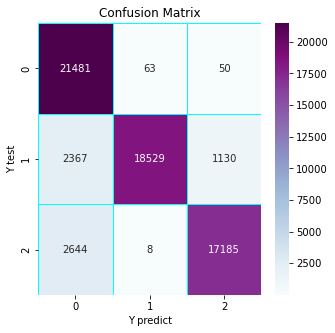

In [65]:
evaluation_metrics(Y_test, preds)

# Support Vector Machines (SVM)

**What is Support Vector Machines  ?**<br>
**-** The Support Vector Machine (SVM) is a powerful and flexible supervised machine learning algorithm used for both classification and regression tasks. The SVM is based on the idea of finding a hyperplane that best separates the features into different classes. In a 2-D space, a hyperplane is a line that optimally divides the data points into two different classes.

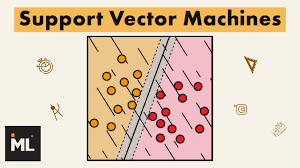

In [66]:
# Data normalization for KNN and Pca
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
svc = SVC()

svc.fit(X_train_scaled, Y_train)

preds = svc.predict(X_test_scaled)

acc_svc = (preds == Y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))


Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 93.36


              precision    recall  f1-score   support

           0       0.84      1.00      0.91     21594
           1       1.00      0.91      0.95     22026
           2       1.00      0.89      0.94     19837

    accuracy                           0.93     63457
   macro avg       0.95      0.93      0.93     63457
weighted avg       0.94      0.93      0.93     63457

F1 Score:  0.9347737755583414


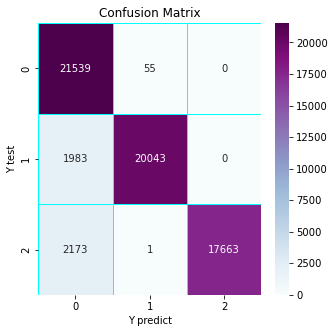

In [68]:
evaluation_metrics(Y_test, preds)

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'] 
}

# Create a base model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, Y_train)
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

**I run the code in kaggle notebook. It almost run 3.5 hours.**<br>
**Best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'poly'}**

In [69]:
# Define the model with the best parameters
svc = SVC(C=1, gamma=1, kernel='poly')

# Fit the model
svc.fit(X_train_scaled, Y_train)

# Make predictions
preds = svc.predict(X_test_scaled)

# Compute the accuracy
acc_svc = (preds == Y_test).sum().astype(float) / len(preds)*100

print("Improved Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))


Improved Support Vector Machine Classifier's prediction accuracy is: 95.30


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     21594
           1       0.95      0.94      0.95     22026
           2       0.97      0.96      0.96     19837

    accuracy                           0.95     63457
   macro avg       0.95      0.95      0.95     63457
weighted avg       0.95      0.95      0.95     63457

F1 Score:  0.9530438967308947


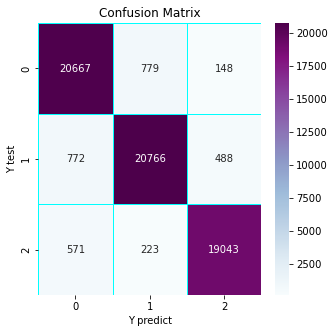

In [70]:
evaluation_metrics(Y_test, preds)

# Random Forest Classifier

**What is Random Forest Classifier ?**<br>
**-** Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

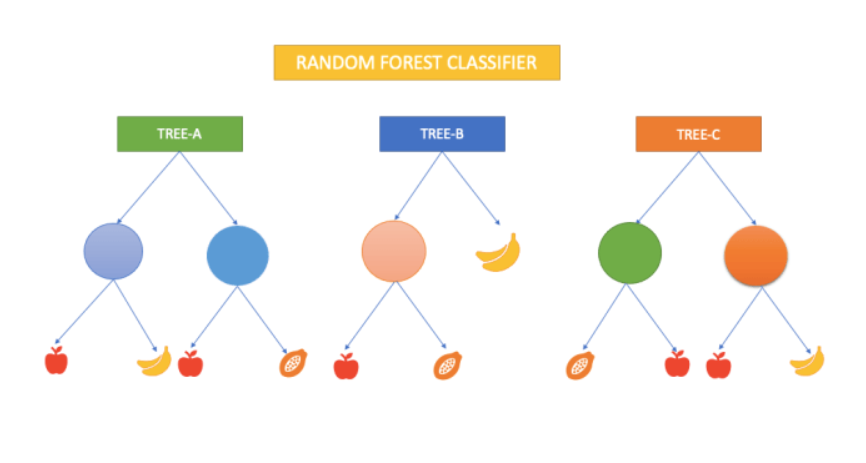

In [15]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train_scaled, Y_train)

preds = rfc.predict(X_test_scaled)

acc_rfc = (preds == Y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))


Scikit-Learn's Random Forest Classifier's prediction accuracy is: 95.59


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21594
           1       0.95      0.95      0.95     22026
           2       0.97      0.97      0.97     19837

    accuracy                           0.96     63457
   macro avg       0.96      0.96      0.96     63457
weighted avg       0.96      0.96      0.96     63457

F1 Score:  0.9559361323926017


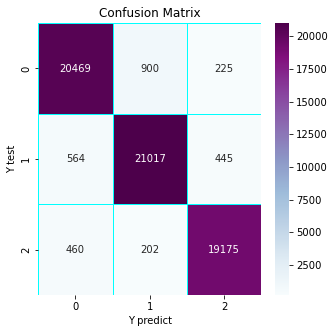

In [17]:
evaluation_metrics(Y_test, preds)

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, verbose=2)
grid_search.fit(X_train_scaled, Y_train)

best_grid = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)


**I run the code in kaggle notebook. It almost run 11 hours.**<br>
**Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}**

In [31]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=5)
rfc.fit(X_train_scaled, Y_train)

preds = rfc.predict(X_test_scaled)

acc_rfc = (preds == Y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Random Forest Classifier's prediction accuracy with tuned parameters is: %3.2f" % (acc_rfc))


Scikit-Learn's Random Forest Classifier's prediction accuracy with tuned parameters is: 95.69


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     21594
           1       0.95      0.96      0.95     22026
           2       0.97      0.97      0.97     19837

    accuracy                           0.96     63457
   macro avg       0.96      0.96      0.96     63457
weighted avg       0.96      0.96      0.96     63457

F1 Score:  0.9568466231161346


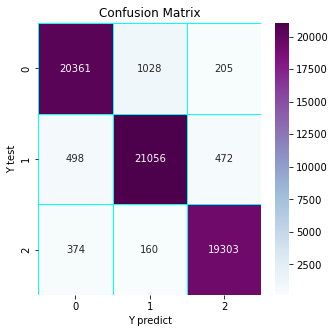

In [32]:
evaluation_metrics(Y_test, preds)

# Xgboost Classifier

**What is Xgboost Classifier ?**<br>
**-**  Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.XGBoost works by training a number of decision trees. Each tree is trained on a subset of the data, and the predictions from each tree are combined to form the final prediction.

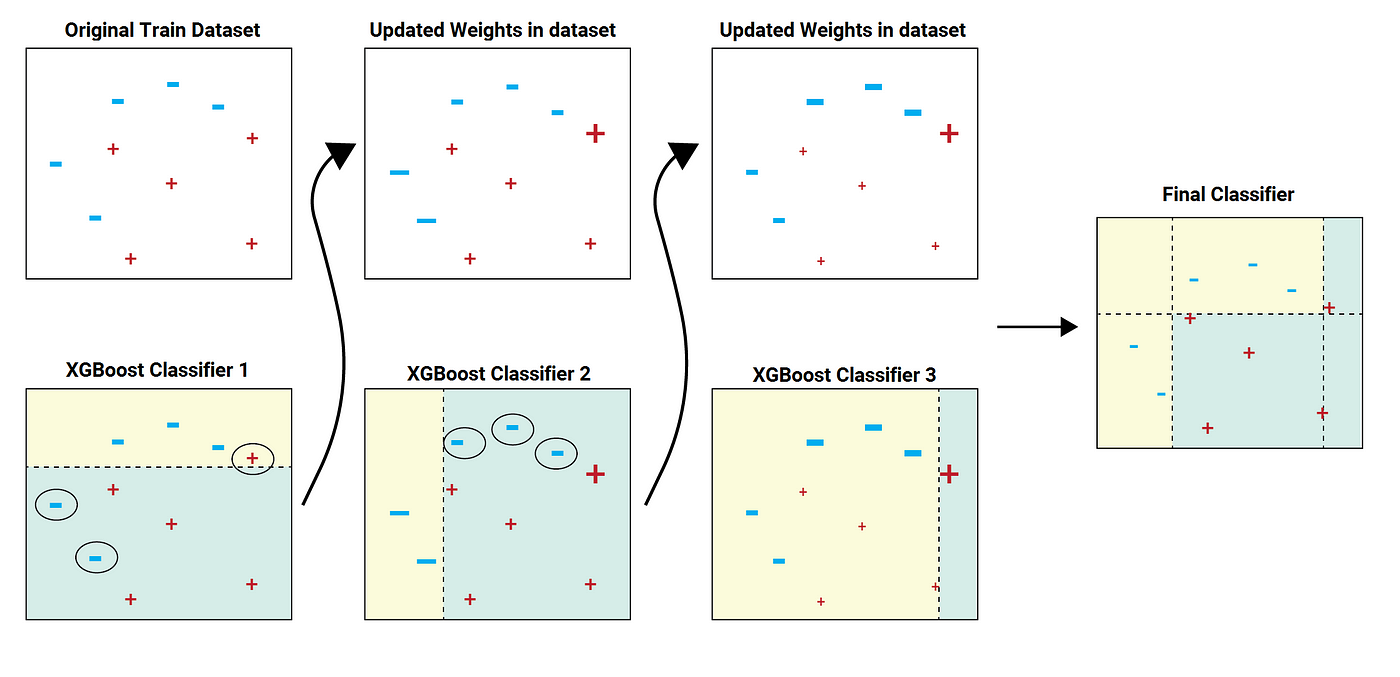

In [76]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train_scaled, Y_train)

preds = xgb.predict(X_test_scaled)

acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


XGBoost's prediction accuracy is: 95.75


              precision    recall  f1-score   support

           0       0.96      0.95      0.95     21594
           1       0.95      0.96      0.95     22026
           2       0.96      0.97      0.97     19837

    accuracy                           0.96     63457
   macro avg       0.96      0.96      0.96     63457
weighted avg       0.96      0.96      0.96     63457

F1 Score:  0.9574247698956099


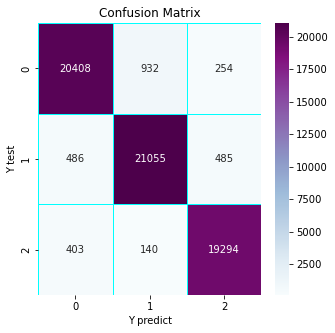

In [78]:
evaluation_metrics(Y_test, preds)

In [ ]:
xgb = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the model
    'max_depth': [3, 5, 7],  # maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # step size for weight updates
    'subsample': [0.5, 0.7, 1.0],  # fraction of examples to be randomly sampled for each tree
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0]  # fraction of columns to be randomly sampled for each tree
}

# Define the grid search object
grid_search = GridSearchCV(
    estimator=xgb,  # the model to use
    param_grid=param_grid,  # the parameter grid to search over
    cv=4,  # number of cross-validation folds
    verbose=2,  # controls the verbosity: the higher, the more messages
    n_jobs=-1,  # number of CPUs to use for the computation. -1 means using all processors.
)

# Fit the grid search object to the data
grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)


**I run the code in kaggle notebook. It almost run 9.5 hours.**<br>
**Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}**

In [79]:
# Initialize the XGBoost classifier with the optimal parameters
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Fit the model to the scaled training data
xgb.fit(X_train_scaled, Y_train)

# Use the trained model to predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))


XGBoost's prediction accuracy with optimized parameters is: 95.81


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     21594
           1       0.95      0.96      0.95     22026
           2       0.97      0.97      0.97     19837

    accuracy                           0.96     63457
   macro avg       0.96      0.96      0.96     63457
weighted avg       0.96      0.96      0.96     63457

F1 Score:  0.9581059973579744


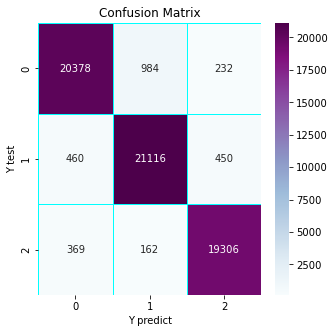

In [80]:
evaluation_metrics(Y_test, preds)

In [81]:
importances = pd.DataFrame({
    'Feature': pd.DataFrame(X_train_scaled,columns=X_train.columns).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
P02055,0.284862
P02072,0.245823
T02041,0.163995
Z02013,0.072223
E02056,0.055544
T02040,0.020795
T02014,0.014842
T01351,0.014693
T02042,0.012692


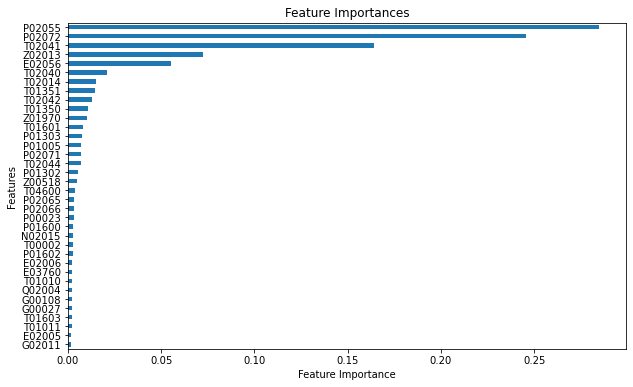

In [82]:


plt.figure(figsize=(10, 6))  # Increase the size of the figure
importances.Importance.sort_values().plot(kind='barh')  # Horizontal bar plot
plt.xlabel('Feature Importance')  # X-axis label
plt.ylabel('Features')  # Y-axis label
plt.title('Feature Importances')  # Title of the plot
plt.show()


# Multi Layer Perceptron Classifier

**What is Multi Layer Perceptron Classifier ?**<br>
**-**  A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

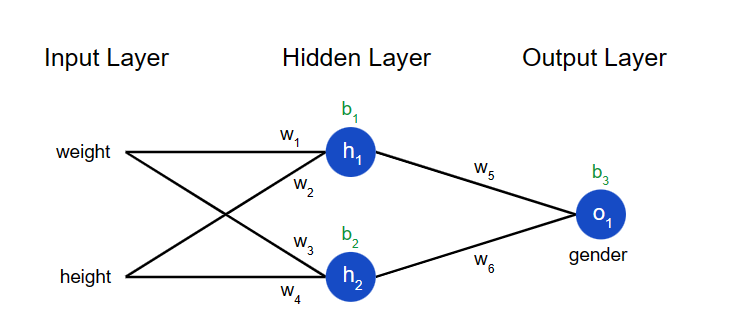

In [12]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Create the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train_scaled, Y_train)

# Make predictions
preds = mlp.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_mlp = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("Multi Layer Perceptron's prediction accuracy: %3.2f" % (acc_mlp))

Multi Layer Perceptron's prediction accuracy: 95.60


In [24]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     21594
           1       0.97      0.93      0.95     22026
           2       0.97      0.97      0.97     19837

    accuracy                           0.96     63457
   macro avg       0.96      0.96      0.96     63457
weighted avg       0.96      0.96      0.96     63457

F1 Score:  0.9560389704323278


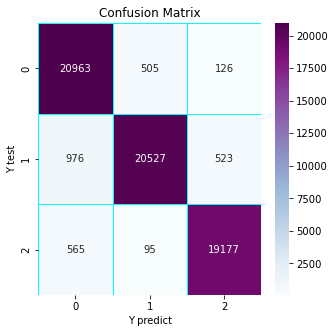

In [23]:
evaluation_metrics(Y_test, preds)

In [ ]:
# The parameters to be fit
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier(max_iter=1000, random_state=42)

# The grid search object
GV_MLP = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5, verbose=10)

# Do the grid search
GV_MLP.fit(X_train_scaled, Y_train)
print(GV_MLP.best_params_)

**I run the code in kaggle notebook. It almost run 5 hours.**<br>
**Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}**

In [13]:
# Create the MLP classifier with the suggested parameters
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', alpha=0.0001, learning_rate='constant', solver='adam', max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train_scaled, Y_train)

# Make predictions
preds = mlp.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_mlp = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("Multi Layer Perceptron's prediction accuracy with optimized parameters: %3.2f" % (acc_mlp))


Multi Layer Perceptron's prediction accuracy with optimized parameters: 95.40


In [37]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     21594
           1       0.94      0.95      0.95     22026
           2       0.97      0.97      0.97     19837

    accuracy                           0.95     63457
   macro avg       0.95      0.95      0.95     63457
weighted avg       0.95      0.95      0.95     63457

F1 Score:  0.954057016995212


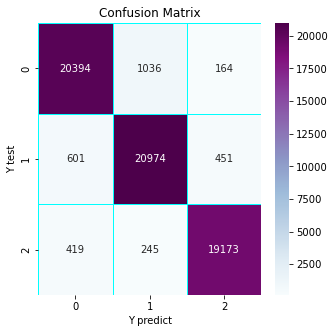

In [14]:
evaluation_metrics(Y_test, preds)

# Extra Trees Classifier

In [65]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
etc.fit(X_train_scaled, Y_train)

# Make predictions on the test data
preds = etc.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_etc = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("Extra Trees Classifier's prediction accuracy: %3.2f" % (acc_etc))


Extra Trees Classifier's prediction accuracy: 95.78


In [60]:
etc.get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     21594
           1       0.95      0.95      0.95     22026
           2       0.96      0.97      0.97     19837

    accuracy                           0.96     63457
   macro avg       0.96      0.96      0.96     63457
weighted avg       0.96      0.96      0.96     63457

F1 Score:  0.9577728993772479


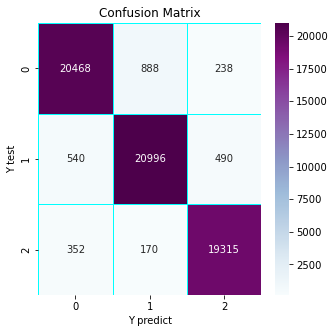

In [55]:
evaluation_metrics(Y_test, preds)

In [ ]:
# Define the parameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print best parameters
print("Best parameters: ", best_params)

**I run the code in kaggle notebook. It almost run 1.5 hours.**<br>
**Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}**

In [63]:
# Initialize the ExtraTreesClassifier with best parameters
etc = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=20, min_samples_leaf=1, min_samples_split=5, random_state=42)

# Fit the model on the training data
etc.fit(X_train_scaled, Y_train)

# Make predictions on the test data
preds = etc.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_etc = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("Extra Trees Classifier's prediction accuracy: %3.2f" % (acc_etc))

Extra Trees Classifier's prediction accuracy: 95.60


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     21594
           1       0.97      0.94      0.96     22026
           2       0.97      0.96      0.96     19837

    accuracy                           0.96     63457
   macro avg       0.96      0.96      0.96     63457
weighted avg       0.96      0.96      0.96     63457

F1 Score:  0.9561216836580032


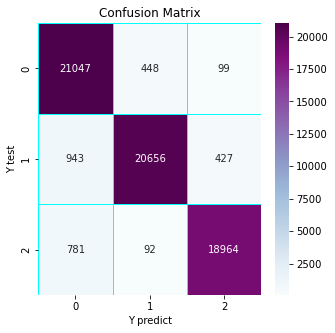

In [64]:
evaluation_metrics(Y_test, preds)

# Comparing Models

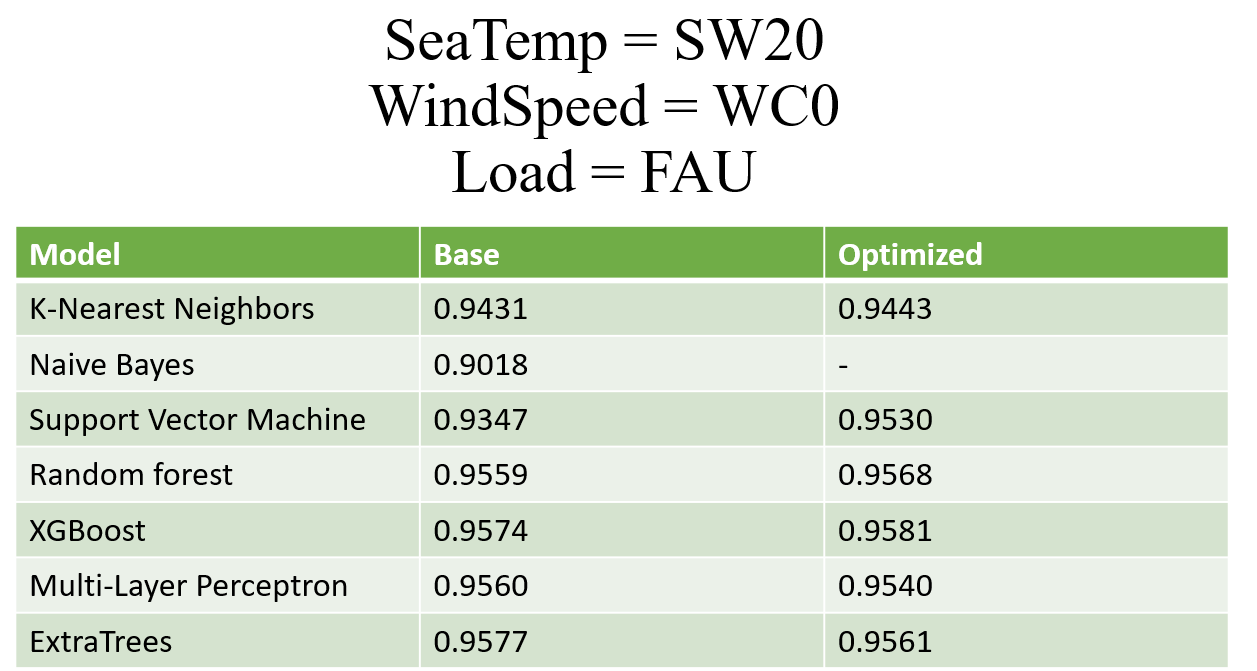

# Other

In [25]:
def convert_to_seconds(time_string):
    h, m, s = map(int, time_string.split(':'))
    return h * 3600 + m * 60 + s

# Let's assume 'Time' is the name of your time column
df_train_frequency=df_train.copy()
df_train_frequency['Time'] = df_train_frequency['Time'].apply(convert_to_seconds)
df_train_frequency

AttributeError: 'DataFrame' object has no attribute 'cop'

# Neural Network

In [102]:
# Data normalization for KNN and Pca
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
n_features = 36
n_classes = 3

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32)
model.summary()
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
pred_probs = model.predict(X_test_scaled)
preds = np.argmax(pred_probs, axis=1)
print('Test accuracy: %.2f' % (accuracy*100))

Epoch 1/10
3802/3802 [==============================] - 7s 2ms/step - loss: 0.1311 - accuracy: 0.9369
Epoch 2/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.1054 - accuracy: 0.9448
Epoch 3/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.1019 - accuracy: 0.9468
Epoch 4/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.1002 - accuracy: 0.9476
Epoch 5/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0981 - accuracy: 0.9496
Epoch 6/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0968 - accuracy: 0.9507
Epoch 7/10
3802/3802 [==============================] - 6s 2ms/step - loss: 0.0953 - accuracy: 0.9515
Epoch 8/10
3802/3802 [==============================] - 7s 2ms/step - loss: 0.0943 - accuracy: 0.9521
Epoch 9/10
3802/3802 [==============================] - 7s 2ms/step - loss: 0.0943 - accuracy: 0.9526
Epoch 10/10
3802/3802 [==============================] - 7s 2ms/step - loss: 0.092

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     21594
           1       0.95      0.94      0.94     22026
           2       0.97      0.96      0.96     19837

    accuracy                           0.95     63457
   macro avg       0.95      0.95      0.95     63457
weighted avg       0.95      0.95      0.95     63457

F1 Score:  0.9505197559347409


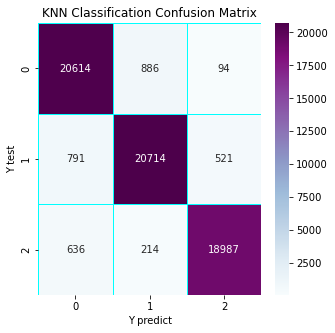

In [115]:
evaluation_metrics(Y_test, preds)

In [116]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

n_features = 36
n_classes = 3

# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Define early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Train the model
model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[es])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
pred_probs = model.predict(X_test_scaled)
preds = np.argmax(pred_probs, axis=1)

print('Test accuracy: %.2f' % (accuracy*100))


Epoch 1/200
3041/3041 [==============================] - 11s 3ms/step - loss: 0.1559 - accuracy: 0.9295 - val_loss: 0.2367 - val_accuracy: 0.8900
Epoch 2/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.1112 - accuracy: 0.9421 - val_loss: 0.2225 - val_accuracy: 0.8937
Epoch 3/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.1081 - accuracy: 0.9431 - val_loss: 0.2001 - val_accuracy: 0.9016
Epoch 4/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.1048 - accuracy: 0.9454 - val_loss: 0.2250 - val_accuracy: 0.8939
Epoch 5/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.1025 - accuracy: 0.9461 - val_loss: 0.2414 - val_accuracy: 0.8884
Epoch 6/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.1027 - accuracy: 0.9461 - val_loss: 0.2171 - val_accuracy: 0.8950
Epoch 7/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.1036 - accuracy: 0.9463 - val_loss: 0.2324 -

Epoch 57/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.0940 - accuracy: 0.9502 - val_loss: 0.1782 - val_accuracy: 0.9097
Epoch 58/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.0989 - accuracy: 0.9510 - val_loss: 0.2238 - val_accuracy: 0.9029
Epoch 59/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.0929 - accuracy: 0.9496 - val_loss: 0.2054 - val_accuracy: 0.9064
Epoch 60/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.0959 - accuracy: 0.9506 - val_loss: 0.2089 - val_accuracy: 0.9068
Epoch 61/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.0942 - accuracy: 0.9503 - val_loss: 0.1839 - val_accuracy: 0.9111
Epoch 62/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.0933 - accuracy: 0.9501 - val_loss: 0.1934 - val_accuracy: 0.9079
Epoch 63/200
3041/3041 [==============================] - 10s 3ms/step - loss: 0.0962 - accuracy: 0.9500 - val_loss: 0

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     21594
           1       0.86      0.99      0.92     22026
           2       1.00      0.91      0.95     19837

    accuracy                           0.94     63457
   macro avg       0.95      0.94      0.94     63457
weighted avg       0.95      0.94      0.94     63457

F1 Score:  0.9409112686162142


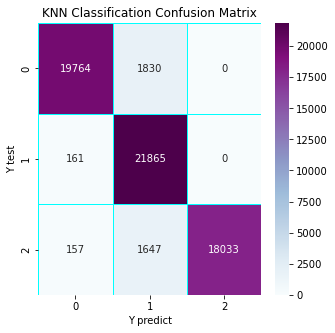

In [117]:
evaluation_metrics(Y_test, preds)